## Подготовим текст и звук из видео, а также эталонное прочтение

In [44]:
!pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz # потому что у них там баг (https://stackoverflow.com/questions/75495800/error-unable-to-extract-uploader-id-youtube-discord-py)

  Using cached https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz (2.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached mutagen-1.47.0-py3-none-any.whl (194 kB)
  Using cached pycryptodomex-3.19.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.1 MB)
  Using cached websockets-12.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (130 kB)
  Using cached certifi-2023.11.17-py3-none-any.whl (162 kB)
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
  Using cached urllib3-2.1.0-py3-none-any.whl (104 kB)
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (3.0 MB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (142 kB)
  Using cached idna-3.6-py3-none-

In [45]:
import yt_dlp as youtube_dl
import urllib
import shutil

In [46]:
ydl_opts = {
    'format': 'bestaudio/best',
    'outtmpl': 'i want to marry him for your money',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
        'preferredquality': '192',
    }],
}

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=B5eOcnunhC8&ab_channel=NextLevel'])

[youtube] Extracting URL: https://www.youtube.com/watch?v=B5eOcnunhC8&ab_channel=NextLevel
[youtube] B5eOcnunhC8: Downloading webpage
[youtube] B5eOcnunhC8: Downloading ios player API JSON
[youtube] B5eOcnunhC8: Downloading android player API JSON
[youtube] B5eOcnunhC8: Downloading m3u8 information
[info] B5eOcnunhC8: Downloading 1 format(s): 251
[download] Destination: i want to marry him for your money
[download] 100% of    1.29MiB in 00:00:00 at 9.72MiB/s   
[ExtractAudio] Destination: i want to marry him for your money.wav
Deleting original file i want to marry him for your money (pass -k to keep)


In [47]:
# что-то это не сработало, возьмём другую библу
ydl_opts = {
    'write_auto_sub':True,
    'skip_download':True,
    'output':'marry_him_for_your_money_auto_subtitles.txt'
}

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=B5eOcnunhC8&ab_channel=NextLevel'])

[youtube] Extracting URL: https://www.youtube.com/watch?v=B5eOcnunhC8&ab_channel=NextLevel
[youtube] B5eOcnunhC8: Downloading webpage
[youtube] B5eOcnunhC8: Downloading ios player API JSON
[youtube] B5eOcnunhC8: Downloading android player API JSON
[youtube] B5eOcnunhC8: Downloading m3u8 information
[info] B5eOcnunhC8: Downloading 1 format(s): 315+251


In [48]:
!pip install youtube-transcript-api

In [49]:
from youtube_transcript_api import YouTubeTranscriptApi
srt = YouTubeTranscriptApi.get_transcript("B5eOcnunhC8?si=3gSCRd_yw9BXjmR2")
full_text = ''
for dur in srt:
    full_text += dur['text'] + ' '

In [50]:
print(full_text)

I love her very much I've never had a feeling like this up young lady you don't fool me one bit I'm not trying to but I bet I could though no you might convince this jackass that you love him but you'll never convince me that's too bad for his money no no honestly got the nerve to stand there and expect me to believe that you don't want to marry my son for his money it do you want to marry him for I want to marry him for your money Fair oh Lorelei did you see that's why we have to have his consent silly well at least we're getting down to brass tacks you admit that all your after is money no I don't aren't you funny don't you know that a man being rich is like a girl being pretty you might not marry a girl just because she's pretty but my goodness doesn't it help and if you had a daughter wouldn't you rather she didn't marry a poor man you'd wanted to have the most wonderful things in the world and to be very happy oh why is it wrong for me to want those things well I can see that say 

In [51]:
correct_text = '''I love her very much. I've never had a feeling like this...
Oh, shut up. Young lady, you don't fool me one bit.
I'm not trying to. But I bet I could though.
No, you might convince this jackass that you love him, but you'll never convince me.
That's too bad. Because I do love him.
Certainly, for his money.
No, honestly.
Have you got the nerve to stand there and expect me to believe that you don't want to marry my son for his money?
It's true.
Then what do you want to marry him for?
I want to marry him for your money.
There! Oh, Lorelie...
Don't you see that's why we have to have his concent, silly.
Well, at least we're getting down to brass tacks. You admit that all you're after is money.
No, I don't. Aren't you funny? Don't you know that a man being rich is like a girl being pretty?
You might not marry a girl just because she's pretty, but my goodness, doesn't it help?
And if you had a daughter, wouldn't you rather she didn't marry a poor man?
You'd wanted her to have the most wonderful things in the world and to be very happy.
Oh why is it wrong for me to want those things?
Well, I can see that... Say, they told me you were stupid! You don't sound stupid to me!
I can be smart when it's important.'''

## Распознаем текст

Семинар тут: https://colab.research.google.com/github/facebookresearch/fairseq/blob/main/examples/mms/tts/tutorial/MMS_TTS_Inference_Colab.ipynb


ДЗ тут:https://github.com/named-entity/hse-nlp/blob/master/4th_year/hw/hw2.md

### Whisper

https://github.com/openai/whisper

In [9]:
! pip install git+https://github.com/openai/whisper.git
! pip install jiwer

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
llmx 0.0.15a0 requires cohere, which is not installed.
llmx 0.0.15a0 requires openai, which is not installed.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 28.0 MB/s eta 0:00:00


In [13]:
import whisper
import numpy as np

In [36]:
model = whisper.load_model("base.en")
print(
    f"Model is {'multilingual' if model.is_multilingual else 'English-only'} "
    f"and has {sum(np.prod(p.shape) for p in model.parameters()):,} parameters."
)
result = model.transcribe("/content/i want to marry him for your money.wav")

Model is English-only and has 71,825,408 parameters.


/usr/local/lib/python3.10/dist-packages/whisper/transcribe.py:126: UserWarning: FP16 is not supported on CPU; using FP32 instead
  warnings.warn("FP16 is not supported on CPU; using FP32 instead")


In [24]:
whisper_text = result["text"]
print(whisper_text) # идеально лол

 I love her very much. I've never had a feeling like this. Shut up. Young lady, you don't fool me one bit. I'm not trying to, but I bet I could, though. No, you might convince this jackass that you love him, but you'll never convince me. That's too bad, because I do love him. Certainly, for his money? No, honestly. Have you got the nerve to stand there and expect me to believe that you don't want to marry my son for his money? It's true. Then what do you want to marry him for? I want to marry him for your money. Fair. Oh, Lorelai. Don't you see? That's why we have to have his consent, silly. Well, at least we're getting down to brass tacks. You admit that all you're after is money. No, I don't. Aren't you funny? Don't you know that a man being rich is like a girl being pretty? You might not marry a girl just because she's pretty. But my goodness, doesn't it help? And if you had a daughter, wouldn't you rather? She didn't marry a poor man. But I was. You'd want her to have the most wond

## SpeechRecognition

In [52]:
!pip install SpeechRecognition

In [64]:
!pip install PocketSphinx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.2/29.2 MB 3.8 MB/s eta 0:00:00


In [54]:
import speech_recognition as sr

In [55]:
r = sr.Recognizer()
wav_file = sr.AudioFile('/content/i want to marry him for your money.wav')
with wav_file as source:
    audio = r.record(source)
google_result = r.recognize_google(audio)

In [56]:
print(google_result)

I love her very much I've never had a feeling like this job young lady you don't fool me one bit I'm not trying to but I bet I could though you might convince this jackass that you love him but you'll never convince me that's too bad because I do love him for his money for you and if you had a daughter to have the most wonderful thing in the world why is it wrong for me to want those things well I can see that say they told me you were stupid you don't sound stupid to me I can be smart when it's important


In [67]:
sphinx_result = r.recognize_sphinx(audio)

In [68]:
print(sphinx_result)

i love her very much i've never had a feeling anxious to young lady you don't fool me one bit and then trying to haiti have clean no you would convince this object as to to remember joe never convince me that a man because i do mean certainly for his moderate no constant argue that the marriage then they expect me to believe that you don't wanna marry my show abrasion on it gets to them what do wanna marry him full time lincoln and youthful yan he there it cold war lions hit in time we had twins can see him see any one of the spring getting down to brass tacks you admit that all your letters lay no i don't want you find don't you know the a and b. which is like a guilty plea you might not be negative because she's pretty and tonight treatments doesn't inhale it if you had on a windshield and she didn't nary a poor name what i wished you'd wanna can the most wonderful thing unaware of and i mean i had the whole why hang on for me to want those states where i can show you that taipei the

# Считаем качество
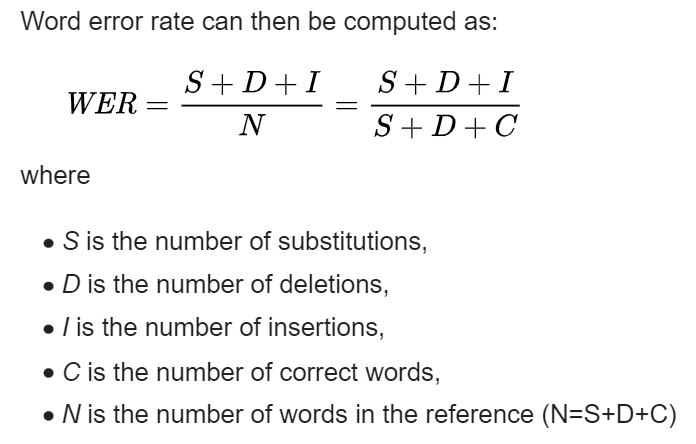

In [69]:
!pip install jiwer

In [81]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 4.7 MB/s eta 0:00:00


In [82]:
from jiwer import wer
import contractions

In [83]:
# напишем обрабатывалку, чтобы удалять знаки препинания и приводить всё к нижнему регистру
def cleaner(text):
    text = text.replace('\n', ' ')
    text = text.replace('.', '')
    text = text.replace(',', '')
    text = text.replace('!', '')
    text = text.replace('?', '')

    # это нужно, чтобы не спорить, было там you are или you're
    # потому что это не всегда даже носителю слышно
    text_with_full_forms = []
    for word in text.lower().split(' '):
        text_with_full_forms.append(contractions.fix(word))

    return ' '.join(text_with_full_forms)

In [84]:
print(wer(cleaner(correct_text), cleaner(whisper_text)))

0.030534351145038167


In [85]:
print(wer(cleaner(correct_text), cleaner(google_result)))

0.5687022900763359


In [86]:
print(wer(cleaner(correct_text), cleaner(sphinx_result)))

0.5610687022900763


Whisper идеален))))